## Step 4: Data Wrangling

Start off by connecting to the database (as above), import pandas as pd, and then load back your DataFrames: airlines, airports, routes and incidents (not counting flights, which will take forever to load) from SQL, using the syntax:

```
    dataframe = pd.read_sql_query('select * from table_name', engine)
```

In [1]:
import sqlite3
import pandas as pd

engine = sqlite3.connect('HW1_DB')

# TODO: Re-load dataframes from SQL

airlines_df = pd.read_sql_query('select * from airlines', engine)
airports_df = pd.read_sql_query('select * from airports', engine)
routes_df = pd.read_sql_query('select * from routes', engine)
incidents_df = pd.read_sql_query('select * from incidents', engine)

In [2]:
if 'index' in airlines_df.columns:
    raise ValueError('SQL added an index column -- shouldn''t have that plus the Pandas index')
    
if 'index' in airports_df.columns:
    raise ValueError('SQL added an index column -- shouldn''t have that plus the Pandas index')

if 'index' in routes_df.columns:
    raise ValueError('SQL added an index column -- shouldn''t have that plus the Pandas index')

if 'index' in incidents_df.columns:
    raise ValueError('SQL added an index column -- shouldn''t have that plus the Pandas index')

## Step 4.1: Understanding our data

Take a look at the details of our dataframes...

In [3]:
airlines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6048 entries, 0 to 6047
Data columns (total 8 columns):
airline_id          6048 non-null int64
airline_name        6048 non-null object
airline_alias       6048 non-null object
airline_iata        6048 non-null object
airline_icao        6048 non-null object
airline_callsign    6048 non-null object
airline_country     6048 non-null object
airline_active      6048 non-null object
dtypes: int64(1), object(7)
memory usage: 378.1+ KB


In [4]:
airlines_df

,airline_id,airline_name,airline_alias,airline_iata,airline_icao,airline_callsign,airline_country,airline_active
0,1,Private flight,,-,,,,Y
1,2,135 Airways,,,GNL,GENERAL,United States,N
2,3,1Time Airline,,1T,RNX,NEXTIME,South Africa,Y
3,4,2 Sqn No 1 Elementary Flying Training School,,,WYT,,United Kingdom,N
4,5,213 Flight Unit,,,TFU,,Russia,N
5,6,223 Flight Unit State Airline,,,CHD,CHKALOVSK-AVIA,Russia,N
6,7,224th Flight Unit,,,TTF,CARGO UNIT,Russia,N
7,8,247 Jet Ltd,,,TWF,CLOUD RUNNER,United Kingdom,N
8,9,3D Aviation,,,SEC,SECUREX,United States,N
9,10,40-Mile Air,,Q5,MLA,MILE-AIR,United States,Y


In [5]:
airlines_df.describe()

,airline_id
count,6048.000000
mean,3844.729167
std,3945.495487
min,-1.000000
25%,1512.750000
50%,3025.500000
75%,4543.250000
max,19845.000000


In [6]:
airports_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8107 entries, 0 to 8106
Data columns (total 12 columns):
airport_id           8107 non-null int64
airport_name         8107 non-null object
airport_city         8107 non-null object
airport_country      8107 non-null object
airport_iata_faa     8107 non-null object
airport_icao         8107 non-null object
airport_latitude     8107 non-null float64
airport_longitude    8107 non-null float64
airport_altitude     8107 non-null int64
airport_timezone     8107 non-null float64
airport_dst          8107 non-null object
airport_tz           8107 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 760.1+ KB


In [7]:
airports_df 

,airport_id,airport_name,airport_city,airport_country,airport_iata_faa,airport_icao,airport_latitude,airport_longitude,airport_altitude,airport_timezone,airport_dst,airport_tz
0,1,Goroka,Goroka,Papua New Guinea,GKA,AYGA,-6.081689,145.391881,5282,10.0,U,Pacific/Port_Moresby
1,2,Madang,Madang,Papua New Guinea,MAG,AYMD,-5.207083,145.788700,20,10.0,U,Pacific/Port_Moresby
2,3,Mount Hagen,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826789,144.295861,5388,10.0,U,Pacific/Port_Moresby
3,4,Nadzab,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569828,146.726242,239,10.0,U,Pacific/Port_Moresby
4,5,Port Moresby Jacksons Intl,Port Moresby,Papua New Guinea,POM,AYPY,-9.443383,147.220050,146,10.0,U,Pacific/Port_Moresby
5,6,Wewak Intl,Wewak,Papua New Guinea,WWK,AYWK,-3.583828,143.669186,19,10.0,U,Pacific/Port_Moresby
6,7,Narsarsuaq,Narssarssuaq,Greenland,UAK,BGBW,61.160517,-45.425978,112,-3.0,E,America/Godthab
7,8,Nuuk,Godthaab,Greenland,GOH,BGGH,64.190922,-51.678064,283,-3.0,E,America/Godthab
8,9,Sondre Stromfjord,Sondrestrom,Greenland,SFJ,BGSF,67.016969,-50.689325,165,-3.0,E,America/Godthab
9,10,Thule Air Base,Thule,Greenland,THU,BGTL,76.531203,-68.703161,251,-4.0,E,America/Thule


In [8]:
airports_df.describe()

,airport_id,airport_latitude,airport_longitude,airport_altitude,airport_timezone
count,8107.000000,8107.000000,8107.000000,8107.000000,8107.000000
mean,4766.361046,26.817720,-3.921969,933.449365,0.169236
std,2943.205193,27.866953,85.900873,1624.740899,5.737326
min,1.000000,-89.999997,-179.877000,-1266.000000,-12.000000
25%,2091.500000,8.824928,-79.022498,38.000000,-5.000000
50%,4257.000000,34.987800,5.292028,272.000000,1.000000
75%,7508.500000,47.957599,49.785821,1020.000000,4.000000
max,9541.000000,82.517778,179.951000,14472.000000,13.000000


In [9]:
routes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66548 entries, 0 to 66547
Data columns (total 9 columns):
airline_iata_icao    66548 non-null object
airline_id           66548 non-null int64
source_iata_icao     66548 non-null object
source_id            66548 non-null int64
target_iata_icao     66548 non-null object
target_id            66548 non-null int64
routes_share         66548 non-null object
routes_stops         66548 non-null int64
routes_equipment     66548 non-null object
dtypes: int64(4), object(5)
memory usage: 4.6+ MB


In [10]:
routes_df

,airline_iata_icao,airline_id,source_iata_icao,source_id,target_iata_icao,target_id,routes_share,routes_stops,routes_equipment
0,2B,410,AER,2965,KZN,2990,,0,CR2
1,2B,410,ASF,2966,KZN,2990,,0,CR2
2,2B,410,ASF,2966,MRV,2962,,0,CR2
3,2B,410,CEK,2968,KZN,2990,,0,CR2
4,2B,410,CEK,2968,OVB,4078,,0,CR2
5,2B,410,DME,4029,KZN,2990,,0,CR2
6,2B,410,DME,4029,NBC,6969,,0,CR2
7,2B,410,DME,4029,UUA,6160,,0,CR2
8,2B,410,EGO,6156,KGD,2952,,0,CR2
9,2B,410,EGO,6156,KZN,2990,,0,CR2


In [11]:
routes_df.describe()

,airline_id,source_id,target_id,routes_stops
count,66548.000000,66548.000000,66548.000000,66548.000000
mean,3367.569754,2660.201929,2662.088192,0.000165
std,3182.024330,1577.965637,1578.661433,0.012856
min,10.000000,1.000000,1.000000,0.000000
25%,1317.000000,1382.000000,1382.000000,0.000000
50%,2942.000000,2958.000000,2958.000000,0.000000
75%,4608.000000,3670.000000,3670.000000,0.000000
max,19676.000000,9327.000000,9327.000000,1.000000


In [12]:
incidents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 3 columns):
Date         322 non-null object
FlightNum    322 non-null object
Airline      322 non-null object
dtypes: object(3)
memory usage: 7.6+ KB


In [13]:
incidents_df

,Date,FlightNum,Airline
0,1997-01-09 00:00:00,3272,Comair
1,1997-03-18 00:00:00,1023,Stavropolskaya Aktsionernaya Avia
2,1997-04-19 00:00:00,106,Merpati Nusantara Airlines
3,1997-05-08 00:00:00,3456,China Southern Airlines
4,1997-07-31 00:00:00,14,FedEx Express
5,1997-07-17 00:00:00,304,Sempati Air
6,1997-08-06 00:00:00,801,Korean Air
7,1997-08-10 00:00:00,7601,Formosa Airlines
8,1997-09-03 00:00:00,815,Vietnam Airlines
9,1997-09-06 00:00:00,238,Royal Brunei Airlines


In [14]:
incidents_df.describe()

,Date,FlightNum,Airline
count,322,322,322
unique,309,302,237
top,2001-09-11 00:00:00,103,American Airlines
freq,4,3,7



We would expect certain characteristics, such as every airport to have flights, and every airport to be a source and a destination. (Otherwise we’d have a situation where some airports pile up airplanes, and others have no planes!)

Take a look at our data and compute:
* How many airports are origins in a route?
* How many airports are destinations in a route?
* How many cities are in the list of airports?


Output these in a dictionary called results with three keys: {'airports’: _, 'destinations': _, 'sources’: _}

In [15]:
# YOUR CODE HERE
num_origin_airports = routes_df['source_id'].nunique()
num_destination_airports = routes_df['target_id'].nunique()
num_citys = airports_df['airport_city'].nunique()
results = {'airports':num_citys,'destinations': num_destination_airports, 'origins':num_origin_airports}
results

{'airports': 6977, 'destinations': 3170, 'origins': 3167}

In [16]:
# TODO: output dictionary results {‘airports’: ___, ‘destinations’: ___, ‘sources’: ___}
results


{'airports': 6977, 'destinations': 3170, 'origins': 3167}

In [17]:
if 'origins' not in results:
    raise KeyError('Missing key ''origins'' from dictionary')
    
if 'destinations' not in results:
    raise KeyError('Missing key ''origins'' from dictionary')

if 'airports' not in results:
    raise KeyError('Missing key ''origins'' from dictionary')


# 4.2 Looking at Joint Data

Now let's combine information from the different sources!

## Step 4.2.1 Combining DataFrames via Merge (also known as Join)

The first question is which airports are in the data as destinations, but not as sources.  Set the variable `flyable_df` to a dataframe containing the number of airports you can fly to, but not from.  Be sure to eliminate duplicates.

You’ll need to do a merge (join) with the original `airports_df` DataFrame.  Note that `dataframe.merge()` can be called with a second DataFrame, as well as the columns to match (`left_on`, `right_on`).

In [18]:
# TODO: Compute airports you can fly to by not from, in the variable flyable_df

# Drop duplicates
source_routes_df = routes_df.drop_duplicates(subset = 'source_iata_icao')
target_routes_df = routes_df.drop_duplicates(subset = 'target_iata_icao')


# Merge dataframe
sources_df = pd.merge(airports_df, source_routes_df, left_on=['airport_iata_faa'], right_on = ['source_iata_icao'], how = 'right')
targets_df = pd.merge(airports_df, target_routes_df, left_on=['airport_iata_faa'], right_on = ['target_iata_icao'], how = 'right')
#print(len(sources_df))
#print(len(targets_df))
#targets_df.head()
#sources_df.head()

flyable_df = targets_df.merge(sources_df, on =['airport_iata_faa'], how = 'left')

flyable_df = flyable_df[flyable_df['airport_name_y'].isnull()]
flyable_df = flyable_df.rename(columns = {'airport_name_x':'airport_name'})
flyable_df = flyable_df[flyable_df.columns[1:2]]

flyable_df

,airport_name
639,Filippos
1230,Coronel E Carvajal
1233,Teniente Coronel Luis A Mantilla
2062,Utila Airport
2177,Abraham Lincoln Capital
2508,Punta Gorda Airport
2751,Dalanzadgad Airport
2958,Pilot Point Airport
2961,Karuluk Airport
2968,Port Williams Seaplane Base


In [19]:
if not type(flyable_df) is pd.DataFrame:
    raise ValueError("wrong variable type")

if not 'airport_name' in flyable_df.columns:
    raise ValueError("wrong field name")
    

In [20]:
### BEGIN HIDDEN TESTs
if sum(list(flyable_df['airport_name'] == 'Punta Gorda Airport')) != 1:
    raise ValueError("You probably lost an airport")

if sum(list(flyable_df['airport_name'] == 'El Porvenir')) != 1:
    raise ValueError("You probably lost an airport")

## Step 4.2.2: Top-k Destinations

Next let’s consider what destination airports are most-trafficked, by the airport's **city name**.  Recall that we have the frequencies of arrivals for each airport by its ID. You may also find the `.reset_index()` method useful.

Collect the top-k elements into a dataframe called `topk`, with the city and count.

In [21]:
#TODO: top 10 most popular airports

# Create a dictionary:{key = airport_iata/icao, value = airport_city} 
new_airports_df = airports_df.loc[:,['airport_iata_faa','airport_city']]
tocity_dict = new_airports_df.set_index('airport_iata_faa').T.to_dict('list')
for key,value in tocity_dict.items():
    value = value[0]

# Create a new 'city ' Series to reflect the relation between "target_iata_icao" and "city name".
citylist = []
for item in routes_df['target_iata_icao']:
    citylist.append(tocity_dict[item][0])
routes_df['city'] = pd.Series(citylist).values

# Create a dictionary {key = city, value = frequency}
counts = routes_df['city'].value_counts().to_dict()

topk = pd.DataFrame.from_dict(counts, orient='index',columns=[ 'count'])
topk['city'] = topk.index
topk = topk.iloc[:10,:]
topk = topk[['city','count']]
routes_df = routes_df.drop(columns=['city'])
topk

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  """


,city,count
London,London,1224
Atlanta,Atlanta,905
Paris,Paris,720
Chicago,Chicago,680
Shanghai,Shanghai,616
New York,New York,613
Moscow,Moscow,603
Beijing,Beijing,600
Istanbul,Istanbul,504
Los Angeles,Los Angeles,497


In [22]:
if len(topk) != 10:
    raise ValueError("unexpected number of entries")


## Step 4.3: Visualizing the Data

Let’s try to find out how “reliable” an airline is by comparing the number of flight routes it has and the number of incidents it has had in the last 20 years.


In [23]:
# TODO: Create dataframe of airline_iata, number of incidents, number of routes

# YOUR CODE HERE
# Count the number of fight routes using routes_df and merge it with airlines_df.
cnt_routes = routes_df.airline_iata_icao.value_counts().reset_index().rename(columns={'index': 'airline_iata_icao','airline_iata_icao':'flight_count'})
tmp1 = pd.merge(cnt_routes, airlines_df, left_on=['airline_iata_icao'], right_on = ['airline_iata'], how = 'left').dropna()
tmp2 = pd.merge(cnt_routes, airlines_df, left_on=['airline_iata_icao'], right_on = ['airline_icao'], how = 'left').dropna()
cnt_routes_df = pd.concat([tmp1,tmp2])
cnt_routes_df 

# Count the number of incidents_df and merge
cnt_incidents_df = incidents_df.Airline.value_counts().reset_index().rename(columns = {'index':'airline','Airline':'incident_count'})
cnt_incidents_df = cnt_incidents_df[cnt_incidents_df['incident_count']>2]


# Merge cnt_routes_df with cnt_routes_df
merged_df = pd.merge(cnt_incidents_df, cnt_routes_df, left_on = ['airline'], right_on = ['airline_name'],how = 'outer').dropna()
merged_df = merged_df[['airline_iata','flight_count','airline','incident_count']]
merged_df

,airline_iata,flight_count,airline,incident_count
0,AA,2354.0,American Airlines,7.0
1,TK,652.0,Turkish Airlines,6.0
2,AF,1071.0,Air France,5.0
5,WN,1146.0,Southwest Airlines,5.0
6,QF,430.0,Qantas,5.0
7,BA,549.0,British Airways,4.0
9,CI,172.0,China Airlines,4.0
12,UA,2180.0,United Airlines,3.0
13,GA,248.0,Garuda Indonesia,3.0
14,OZ,262.0,Asiana Airlines,3.0


In [24]:
if len(merged_df) != 11:
    raise ValueError("unexpected number of entries")


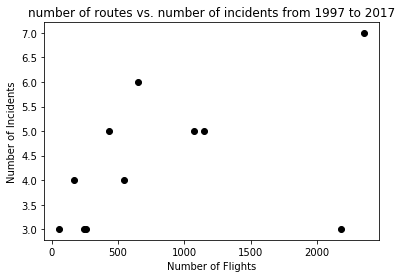

In [25]:
# TODO: Scatter plot of number of routes vs. number of incidents
# ! pip install matplotlib --user
%matplotlib inline

import matplotlib.pyplot as plt
flight_count = merged_df['flight_count']
incident_count = merged_df['incident_count']
n = merged_df['airline']

# Set x-axis label
plt.xlabel('Number of Flights')
# Set y-axis label
plt.ylabel('Number of Incidents')
plt.title('number of routes vs. number of incidents from 1997 to 2017')

plt.scatter(flight_count,incident_count, color = 'k')

# for i, txt in enumerate(n):
#     #print(type(txt))
#     ax.annotate(txt, (flight_count[i], incident_count[i]))
        
    


# Step 5: Integrating Data

Data wrangling typically refers to the process of importing, remapping, and converting data.  On the other hand, data integration typically refers to linking data across heterogeneous sources.  We have an integration problem (in its simplest form) when we want to combine the on-time information (what was originally `flights_df`, and is now in the SQL database) and the route information (`routes_df`).

## 5.1 Relating Routes and Flights: Schema Matching
Now we’ll make use of the on-time flight performance table…  Recall that we put this into an SQL table.

Re-read the flight information into `flights_df`.

Now let’s see if we can actually detect what fields (columns) “match” between `routes_df` and `flights_df` DataFrames.  

To do this, let’s note that we only care about the “categorical” (string-valued) columns.  What we want is, e.g., to find fields that have lots of common values (for instance, airline abbreviations or airport codes).  To measure this in a principled way, we’ll use a measure called the Jaccard distance (or Jaccard index or Jaccard measure).  The Jaccard distance measures similarity between two sets A and B, and is merely:

\begin{equation*}
| A \cap B | / |A \cup B|
\end{equation*}

Let’s compute the Jaccard distances between (the values of) all pairs of attributes in `routes_df` and `flights_df`. This will tell us which attributes include similar values - and thus which might represent the same concept. 

In [26]:
# TODO: get flights from SQL

flights_df = pd.read_sql_query('select * from flights', engine)

flights_df

,YEAR,MONTH,DAY_OF_MONTH,CARRIER,FL_NUM,ORIGIN,DEST,ARR_DELAY_NEW,CANCELLED
0,2018,1,2,WN,1325,SJU,MCO,0.0,0.0
1,2018,1,2,WN,5159,SJU,MCO,0.0,0.0
2,2018,1,2,WN,5890,SJU,MCO,9.0,0.0
3,2018,1,2,WN,6618,SJU,MCO,0.0,0.0
4,2018,1,2,WN,1701,SJU,MDW,8.0,0.0
5,2018,1,2,WN,844,SJU,TPA,23.0,0.0
6,2018,1,2,WN,4679,SJU,TPA,0.0,0.0
7,2018,1,2,WN,6294,SLC,BUR,20.0,0.0
8,2018,1,2,WN,5245,SLC,DAL,0.0,0.0
9,2018,1,2,WN,2278,SLC,DEN,0.0,0.0


In [27]:
if len(flights_df) != 570118:
    raise ValueError('Expected a different number of flights')
    
if len(flights_df.columns) != 9:
    raise ValueError('Perhaps you forgot to remove a column? Number of columns isn''t as expected')
    

In [28]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570118 entries, 0 to 570117
Data columns (total 9 columns):
YEAR             570118 non-null int64
MONTH            570118 non-null int64
DAY_OF_MONTH     570118 non-null int64
CARRIER          570118 non-null object
FL_NUM           570118 non-null int64
ORIGIN           570118 non-null object
DEST             570118 non-null object
ARR_DELAY_NEW    551498 non-null float64
CANCELLED        570118 non-null float64
dtypes: float64(2), int64(4), object(3)
memory usage: 39.1+ MB


## Step 5.1: Column / Schema Matches

Create a Cell with an algorithm that iterates over all `routes_df` keys (columns) and all `flights_df` keys.  In a nested map {r → {p → distance}}, the algorithm should store the Jaccard distance between the values in routes column r to the values in performance column p (for distances that are non-zero and only for non-numeric columns).  Remember, since there may be duplicates, you’ll need to convert columns into sets of unique values through `drop_duplicates()`.  


In [29]:
# TODO: create nested map of Jaccard distance
def DistJaccard(str1, str2):
    str1 = set(str1)
    str2 = set(str2)
    
    return float(len(str1 & str2)) / len(str1 | str2)

routes_str1 = []
for r_col in routes_df:
    if(routes_df[r_col].dtype != 'int64'):
        s = set(routes_df[r_col].drop_duplicates())
        routes_str1.append(s)

flights_str2 = []
for f_col in flights_df:
    if(flights_df[f_col].dtype != 'int64'):
        s = set(flights_df[f_col].drop_duplicates())
        flights_str2.append(s)

routes_df = routes_df.rename(columns = {'airline_iata_icao':'airline_iata'})
best_match = {}
i = 0
for r_col in routes_df:
    if(routes_df[r_col].dtype != 'int64'):
        best_match[r_col] = {}
        j = 0
        for f_col in flights_df:
            
            if(flights_df[f_col].dtype != 'int64'):
                str1 = routes_str1[i]
                str2 = flights_str2[j]
                jacaard = DistJaccard(str1,str2)
                best_match[r_col][f_col] = jacaard
                j = j+1
        i = i+1
best_match              
                


{'airline_iata': {'CARRIER': 0.02197802197802198,
  'ORIGIN': 0.0,
  'DEST': 0.0,
  'ARR_DELAY_NEW': 0.0,
  'CANCELLED': 0.0},
 'source_iata_icao': {'CARRIER': 0.0,
  'ORIGIN': 0.10163624921334173,
  'DEST': 0.10163624921334173,
  'ARR_DELAY_NEW': 0.0,
  'CANCELLED': 0.0},
 'target_iata_icao': {'CARRIER': 0.0,
  'ORIGIN': 0.1018867924528302,
  'DEST': 0.1018867924528302,
  'ARR_DELAY_NEW': 0.0,
  'CANCELLED': 0.0},
 'routes_share': {'CARRIER': 0.0,
  'ORIGIN': 0.0,
  'DEST': 0.0,
  'ARR_DELAY_NEW': 0.0,
  'CANCELLED': 0.0},
 'routes_equipment': {'CARRIER': 0.0,
  'ORIGIN': 0.00023529411764705883,
  'DEST': 0.00023529411764705883,
  'ARR_DELAY_NEW': 0.0,
  'CANCELLED': 0.0}}

In [30]:
if len(best_match) != 5:
    raise ValueError("unexpected number of entries")
if 'airline_iata' not in best_match:
    raise KeyError('Missing airline_iata')
    

The above map should help you decide which pairs of columns (one in each DataFrame) are “semantically equivalent.”  You should be able to find a very clear match between non-numeric codes for airlines in the two DataFrames.  The origin and destination codes will also have corresponding pairs (but if you only look at the Jaccard distances, there will be some ambiguity, since both origin and destination cities have values from the same domain; you will need to use your own knowledge of the semantics of the fields to disambiguate which pairs are correct).


In [31]:
mapping = {}

for key in best_match:
    mapping[key] = {}
    for innerkey in best_match[key]:
        if best_match[key][innerkey] > 0.001:
            mapping[key][innerkey] = best_match[key][innerkey]
mapping

{'airline_iata': {'CARRIER': 0.02197802197802198},
 'source_iata_icao': {'ORIGIN': 0.10163624921334173,
  'DEST': 0.10163624921334173},
 'target_iata_icao': {'ORIGIN': 0.1018867924528302,
  'DEST': 0.1018867924528302},
 'routes_share': {},
 'routes_equipment': {}}

In [32]:
if 'airline_iata' not in mapping:
    raise ValueError('You seem to have dropped something from the dictionary')

# Step 5.2 Creating Detailed Flights, Filtered by OpenFlight Routes

Now that you know how routes_df and flights_df data relate, let’s see how the routes and flights actually relate.  Note that each data source (and thus DataFrame) is in fact incomplete.  For this step we’ll want to only consider the flight information and route information that “intersects.”

## 5.2.1 Flights by Airline and Destination

Create a joint DataFrame `flights_s_df` by merging the two DataFrames on the fields that correspond to flight information.  Use `routes_df.merge` as well as `left_on` and `right_on`.  Note that OpenFlight only has information about certain routes, and we want to focus on the flights corresponding to routes in OpenFlight.

*Hint: you’ll need to pass lists for left_on and right_on in order to merge on the 3 fields between `routes_df` and `flights_df` that you found to “match” in the previous part. These 3 fields should effectively correspond to flights in `flights_df`.*

In [33]:
# TODO: create joint DataFrame flights_s_df 

flights_s_df = pd.merge(routes_df, flights_df, left_on=['airline_iata','source_iata_icao','target_iata_icao'],
                        right_on = ['CARRIER','ORIGIN','DEST'], how='inner')

flights_s_df

,airline_iata,airline_id,source_iata_icao,source_id,target_iata_icao,target_id,routes_share,routes_stops,routes_equipment,YEAR,MONTH,DAY_OF_MONTH,CARRIER,FL_NUM,ORIGIN,DEST,ARR_DELAY_NEW,CANCELLED
0,9E,3976,ATL,3682,CHA,3578,,0,CRJ,2018,1,2,9E,3316,ATL,CHA,0.0,0.0
1,9E,3976,ATL,3682,CHA,3578,,0,CRJ,2018,1,7,9E,3333,ATL,CHA,90.0,0.0
2,9E,3976,ATL,3682,CHA,3578,,0,CRJ,2018,1,8,9E,3333,ATL,CHA,108.0,0.0
3,9E,3976,ATL,3682,CHA,3578,,0,CRJ,2018,1,9,9E,3333,ATL,CHA,2.0,0.0
4,9E,3976,ATL,3682,CHA,3578,,0,CRJ,2018,1,10,9E,3333,ATL,CHA,0.0,0.0
5,9E,3976,ATL,3682,CHA,3578,,0,CRJ,2018,1,11,9E,3333,ATL,CHA,52.0,0.0
6,9E,3976,ATL,3682,CHA,3578,,0,CRJ,2018,1,12,9E,3333,ATL,CHA,NaN,0.0
7,9E,3976,ATL,3682,CHA,3578,,0,CRJ,2018,1,15,9E,3333,ATL,CHA,0.0,0.0
8,9E,3976,ATL,3682,CHA,3578,,0,CRJ,2018,1,16,9E,3333,ATL,CHA,0.0,0.0
9,9E,3976,ATL,3682,CHA,3578,,0,CRJ,2018,1,17,9E,3333,ATL,CHA,143.0,0.0


In [34]:
if len(flights_s_df) != 341370:
    raise ValueError("unexpected number of entries")
    
if flights_s_df.shape[1] != 18:
    raise ValueError("unexpected number of columns")


## 5.2.2 Grouped airline, destination, and flight

In [35]:
# TODO: output for each airline IATA code and destination city IATA code, the number of flights that appear in flights_s_df

grouped_df = flights_s_df.groupby(['airline_iata','target_iata_icao']).count()
grouped_df = grouped_df.reset_index()
grouped_df = grouped_df[['target_id']]
grouped_df

,target_id
0,417
1,40
2,30
3,82
4,27
5,47
6,3
7,4
8,36
9,50


In [36]:
if not 'target_id' in grouped_df.columns:
    raise KeyError('airlines_delayed_cancelled should have a target_id')
    
if len(grouped_df) != 720:
    raise ValueError("unexpected number of entries")

if grouped_df.shape[1] != 1:
    raise ValueError("unexpected number of fields")



## Step 5.2.2: Delayed Flights by Airline and Destination

Now let’s repeat the above, but only for flights that met a frustrating fate.

For each airline IATA code and destination city IATA code, let's compute the number of flights that appear in the `flights_df`, whose arrival was delayed by 20 minutes or more, or which were cancelled (we’ll call this a “bad” flight in 5.2.3).  Assign this to `delayed_cancelled`.

In [37]:
# TODO: output bad flights

isCancelled = flights_s_df['CANCELLED']>0
isDelay = flights_s_df['ARR_DELAY_NEW']>=20
flights_s_df_bad = flights_s_df[isCancelled | isDelay]
delayed_cancelled = flights_s_df_bad.groupby(['airline_iata','target_iata_icao']).count()
delayed_cancelled = delayed_cancelled.reset_index()
delayed_cancelled
delayed_cancelled = delayed_cancelled[['target_id']]
delayed_cancelled


,target_id
0,74
1,7
2,4
3,14
4,3
5,12
6,3
7,11
8,10
9,16


In [38]:
if not 'target_id' in delayed_cancelled.columns:
    raise KeyError('airlines_delayed_cancelled should have a target_id')
    
if len(delayed_cancelled) != 700:
    raise ValueError("unexpected number of entries")

if delayed_cancelled.shape[1] != 1:
    raise ValueError("unexpected number of fields")



## Step 5.2.3: Route Pairs with Multiple Bad Flights

Compute in the dataframe `multiple_bad` the number of “bad” flights for each (airline IATA code, destination city IATA code) pair if that pair has more than five “bad” flights. 

In [39]:
# TODO: pairs with more than five bad flights

multiple_bad = delayed_cancelled[delayed_cancelled['target_id'] > 5]
multiple_bad = multiple_bad[['target_id']]

In [40]:
if not 'target_id' in multiple_bad.columns:
    raise KeyError('airlines_delayed_cancelled should have a target_id')
    
if len(multiple_bad) != 547:
    raise ValueError("unexpected number of entries")

if multiple_bad.shape[1] != 1:
    raise ValueError("unexpected number of fields")


## Step 5.2.4:Multiply Delayed Flights by Airline

What if we re-examine the above question, but by airline instead of by city?  Compute that as `airlines_delayed_cancelled`.  

It should contain, for each airline IATA code, the number of flights that appear in `flights_s_df`, whose arrival was delayed by 30 minutes or more, or which were cancelled.  **Sort** by number of delays/cancellations in decreasing order.


In [41]:
# TODO: delayed flights by airline

isCancelled1 = flights_s_df['CANCELLED']>0
isDelay1 = flights_s_df['ARR_DELAY_NEW']>=30
airlines_delayed_cancelled = flights_s_df[isCancelled1 | isDelay1]
airlines_delayed_cancelled = airlines_delayed_cancelled.groupby(['airline_iata']).count()
airlines_delayed_cancelled = airlines_delayed_cancelled.reset_index()
airlines_delayed_cancelled = airlines_delayed_cancelled[['target_id']]

In [42]:
if not 'target_id' in airlines_delayed_cancelled.columns:
    raise KeyError('airlines_delayed_cancelled should have a target_id')

if len(airlines_delayed_cancelled) != 12:
    raise ValueError("unexpected number of entries")

if airlines_delayed_cancelled.shape[1] != 1:
    raise ValueError("unexpected number of fields")

